# Aykiri Gozlem Analizi 

## Aykiri Degerleri Yakalamak

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")


In [193]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [194]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

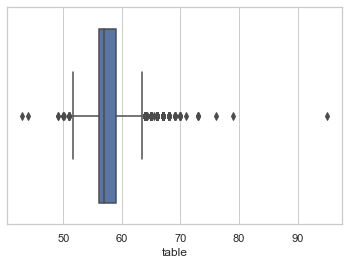

In [195]:
sns.boxplot(x=df_table);

In [196]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

# inter quartile range (IQR)
IQR = Q3 - Q1

In [197]:
print('Q1 =', Q1,'\nQ3 =', Q3,'\nIQR =', IQR)

Q1 = 56.0 
Q3 = 59.0 
IQR = 3.0


In [198]:
df_table.describe().T

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [199]:
df_table.describe()[[4,6]]

25%    56.0
75%    59.0
Name: table, dtype: float64

In [200]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print('Alt sinir=', alt_sinir,'\nUst sinir=', ust_sinir)

Alt sinir= 51.5 
Ust sinir= 63.5


In [201]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [202]:
# Aykiri True - False vektoru (alt sinir icin sadece)

aykiri_tf = (df_table < alt_sinir)

In [203]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [204]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [205]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykiri Deger Problemini Cozmek

## <font color=red>1- Silme Yontemi</font>

In [206]:
type(df_table)

pandas.core.series.Series

In [207]:
df_table = pd.DataFrame(df_table)
type(df_table)

pandas.core.frame.DataFrame

In [208]:
df_table.shape

(53940, 1)

In [209]:
# Temiz DataFrame (Aykiri gozlemleri sildik)
#(~ kosulun disindakileri getri demek) (any axis = 1 sutun bazinda herhangi islem yapmak)

t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis =1)]

In [210]:
# 605 gozlem silindi (53940 - 53335 = 605)

t_df.shape

(53335, 1)

 ## <font color=red>2 - Ortalama ile Doldurmak</font>

In [211]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [212]:
df_table[aykiri_tf]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [213]:
# Ortalamaya Bak

df_table.mean()

table    57.457184
dtype: float64

In [214]:
# Aykiri Gozlemler yerine ortalama atandi

df_table[aykiri_tf] = df_table.mean()

In [215]:
df_table[aykiri_tf].head()

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184


 ## <font color=red>3 - Baskilma Yontemi</font>

#### (Alt tarafta ise alt deger atanir, ust sinirda ise ust deger atanir)

In [216]:
df_table = df['table']

In [217]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [218]:
alt_sinir

51.5

In [219]:
# Alt sinirdaki aykiri degerlere alt sinir degeri atanir

df_table[aykiri_tf] = alt_sinir

In [220]:
df_table[aykiri_tf].head()

1515    51.5
3238    51.5
3979    51.5
4150    51.5
5979    51.5
Name: table, dtype: float64

### 3.2 baskilama Kolay yol (Lambda fonk. ile)

In [ ]:
# aykirilar = aykiri degerler DataFrame i
# alt_s = alt sinir
# ust_s = ust sinir

aykirilar.transform(lambda x : (alt_s) if (x< alt_s) else ust_s)

# Cok Degikenli Aykiri Gozlem Analizi

#### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [221]:
# Orjinal DataFrame uzerinde calisacagiz bu sefer 

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [222]:
# Yeni Kutuphane import ettik

from sklearn.neighbors import LocalOutlierFactor

In [223]:
# n_neighbors = komsu sayisi
# contamination = yogunluk ifade 
# 20 ve 0.1 degeri Veri sayisi ve is bilgisine dayali olarak belirlendi varsadik

clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)

In [224]:
# clf nesnesi LocalOutlierFactorun bicimsel ozelliklerini kullaniyor

clf

LocalOutlierFactor(contamination=0.1)

In [225]:
# Algoritmayi calistirma islemi 

clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [226]:
# Her bir gozlem birimi icin olusturulmus scorelar var

df_score = clf.negative_outlier_factor_

In [227]:
df_score[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [228]:
# Degerler arasindaki farklari inceliyoruz

np.sort(df_score)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.37081214, -4.29842288, -4.10492387, -4.0566648 ])

In [229]:
# 13. Degeri esik degeri olsun dedik

esik_deger = np.sort(df_score)[13]
esik_deger

-3.8013529665815327

In [230]:
aykiri_olmayan_tf = df_score > esik_deger
aykiri_olmayan_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [231]:
# Aykiri Olmayan degerler ulasmak

df[aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [232]:
# Aykiri Olan degerler ulasmak 

#(Onemli NOT : Bir oncekinde aykiri deger sayisi 605 idi (boxplot yonteminde) ,
# burda daha az gozlem var ve aykiri degerler Table icin 51.5< <63.5 idi, yani
# Burdaki Table degerleri (son ucu haric) normal sinir icinde aslinda boxplot a gore.

aykiri_tf = df_score < esik_deger

df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [233]:
# Esik Degerin Kendisi

df[df_score == esik_deger]

,carat,depth,table,price,x,y,z
38053,0.34,54.0,56.0,1012,4.8,4.76,2.58


## Baskilama (df_score icin baskilama)

In [234]:
baski_degeri = df[df_score == esik_deger]
baski_degeri

,carat,depth,table,price,x,y,z
38053,0.34,54.0,56.0,1012,4.8,4.76,2.58


##### Amac : Herbir aykiri deger icin esik degeri atatanacak
1 - Index problemi cikacak

2 - Aykiri olmayanlari arraya cevirecez

3 - Baski degerini arraya cevirecez

4 - Sonra aykirilar yerine baski degeri atanacak

In [235]:
# 1- Yeniden isimlendirdik DataFrame i

aykirilar = df[aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [236]:
# 2 - Aykirilar numpy array oldu

aykirilar.to_records(index = False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [237]:
# 3 - bu array res olarak adlandirildi

res = aykirilar.to_records(index = False)

In [238]:
# 4 - res icindeki tum degerler baski_degeri ne esitlendi

res[:] = baski_degeri.to_records(index= False)
res

rec.array([(0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58),
           (0.34, 54., 56., 1012, 4.8, 4.76, 2.58)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [239]:
# Dikkat , ama ana df yapisi icinde hala aykiri degerler ayni

df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [245]:
# 5 - Ana df aykiri degerler yerine res degerleri atandi , 
# Atama isleminde index olarak df indexi secildi , sabit kaldi 

df[aykiri_tf] = pd.DataFrame(res, index = df[aykiri_tf].index)
df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.34,54.0,56.0,1012,4.8,4.76,2.58
10377,0.34,54.0,56.0,1012,4.8,4.76,2.58
24067,0.34,54.0,56.0,1012,4.8,4.76,2.58
31230,0.34,54.0,56.0,1012,4.8,4.76,2.58
36503,0.34,54.0,56.0,1012,4.8,4.76,2.58
38840,0.34,54.0,56.0,1012,4.8,4.76,2.58
41918,0.34,54.0,56.0,1012,4.8,4.76,2.58
45688,0.34,54.0,56.0,1012,4.8,4.76,2.58
48410,0.34,54.0,56.0,1012,4.8,4.76,2.58
49189,0.34,54.0,56.0,1012,4.8,4.76,2.58


In [246]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


#### Baskilama kolay yolu 

##### 1- Yeniden isimlendirdik DataFrame i

aykirilar = df[aykiri_tf]

##### 2- Aykirilar yerine baski degeri atanir 

aykirilar[0:] = baski_degeri

##### 3 - Ana df deki degerler yerine aykirilar atanir

df[aykiri_tf] = aykirilar

# Eksik Veri Analizi 

## Hizli Cozum 

In [371]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Bos Gozlem Sayisi Kolon basina

In [261]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

#### Bos olmayan Sayisi (Dolu) kolon basina

In [262]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

##### Toplam bos gozlem sayisi

In [263]:
df.isnull().sum().sum()

7

#### True - False (Boolean) Sorgusu

In [ ]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


#### Bos Satirlari getirmek

In [ ]:
df[df.isnull().any(axis= 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


#### Dolu Satirlari getirmek (Bos olmayan)

In [ ]:
df[df.notnull().all(axis= 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Dolu Satirlari getirmek (Elle , manuel)

In [316]:
df[df['V1'].notnull() & df['V2'].notnull() & df['V3'].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Degerlerin Silinmesi

In [ ]:
# dropna(inplace = True) ===> bir tane bile eksiklik varsa siler

In [382]:
# df.dropna(axis=0, how='any', inplace= False) Default degerleri 

df.dropna(axis=0, how='any', inplace= False)
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [319]:
df.dropna(inplace= False)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [321]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


## Eksik Degerlerin Doldulurulmasi

#### fillna()  

In [322]:
df.V1

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [323]:
df.V1.mean()

6.0

In [324]:
df.V1 = df.V1.fillna(df.V1.mean())
df.V1

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [328]:
df.V2.fillna(0, inplace= False)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

#### Apply ile her kolonu ortalamsi (mean) ile doldurmak (fillna)

In [339]:
# x  = kolon ifade eder 
# apply = herbir kolon (sutun) uzerinde islem yapilacak demek
# axis = 0 ise kolon ortalamasini ekler 
# axis = 1 ise satirin ortalamasini ekler !!!!!!!!!

df.apply(lambda x : x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [340]:
df.apply(lambda x : x.mean())

V1     6.000000
V2     6.166667
V3    11.000000
dtype: float64

In [336]:
df.apply(lambda x : x.fillna(x.mean()), axis = 1)

,V1,V2,V3
0,1.0,7.0,4.0
1,3.0,7.5,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,4.0,7.0
6,6.0,6.0,6.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [337]:
df.apply(lambda x : x.mean())

V1     6.000000
V2     6.166667
V3    11.000000
dtype: float64

## Eksik Değerlerin Saptanması

In [ ]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

In [ ]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

In [ ]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

In [ ]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

In [ ]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

## Eksik Veri Yapisinin Gorsellestirme

In [344]:
!pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [346]:
import missingno as msno

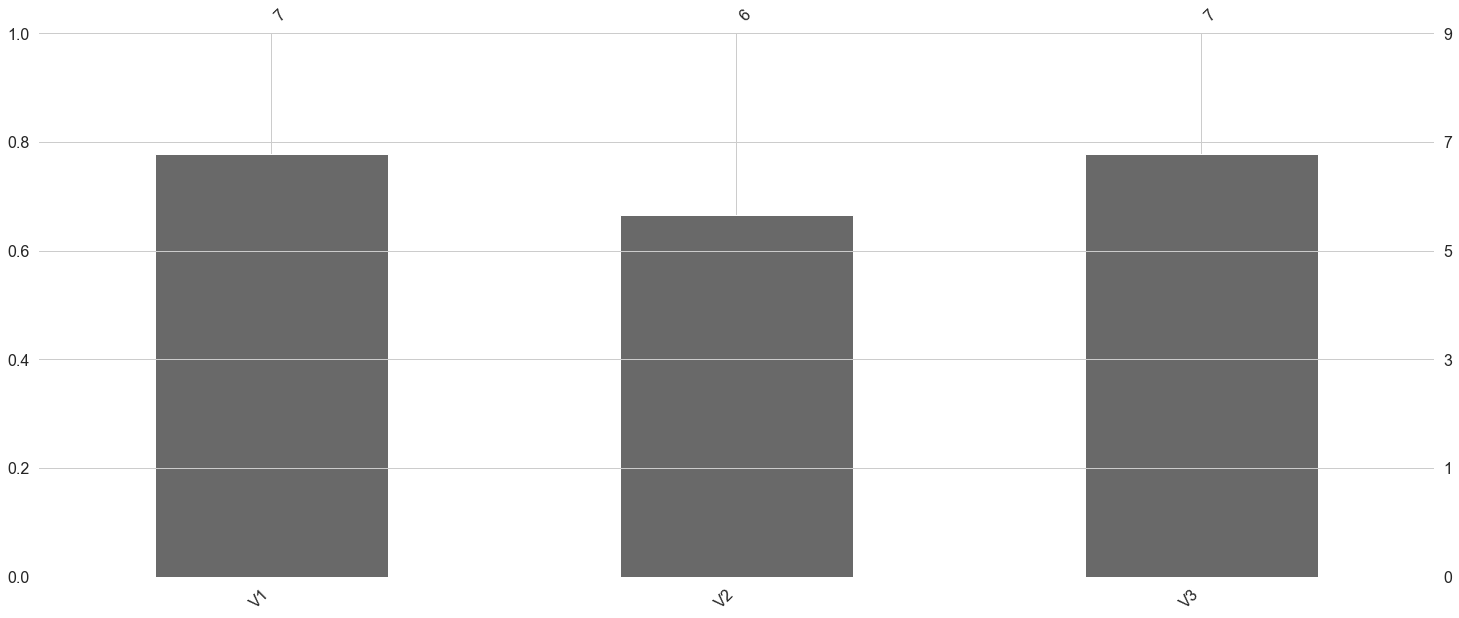

In [350]:
msno.bar(df);

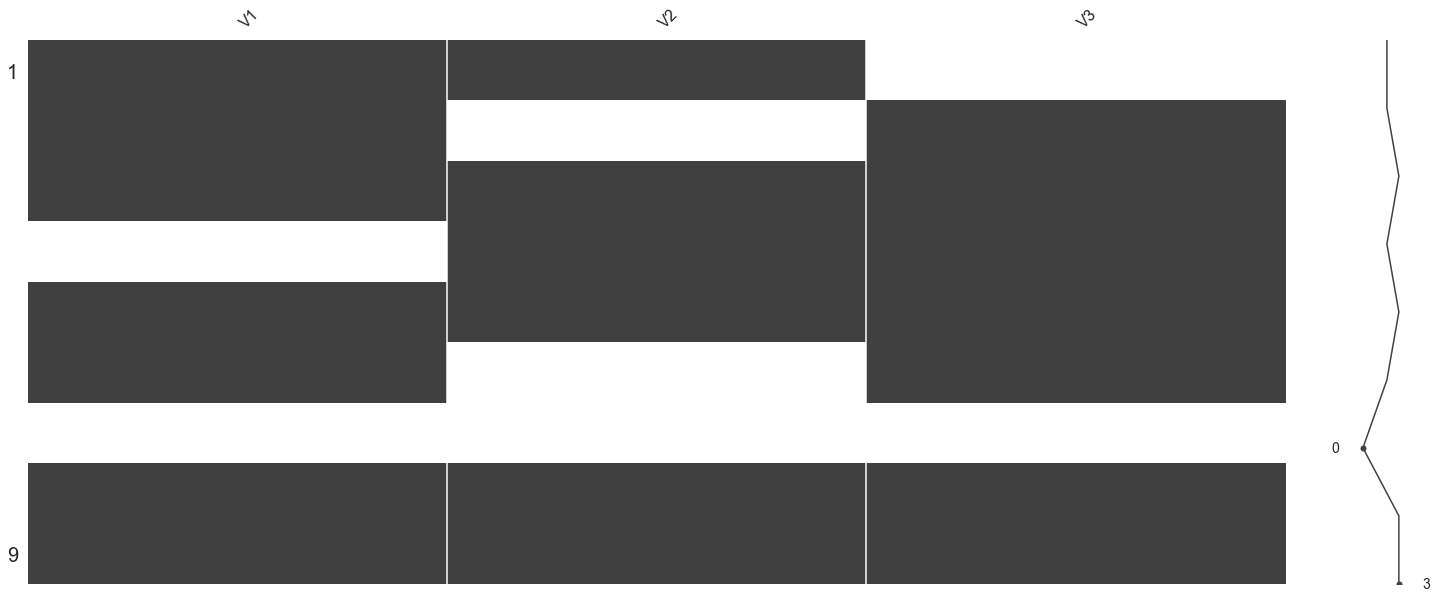

In [354]:
msno.matrix(df);

# Sol taraf gozlem sayisi 
# Sag taraf dolu gozlem sayisi
# Beyaz olanlalar bos gozlemler, 6. index hepsi bos , heryer beyaz

In [352]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [355]:
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [356]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

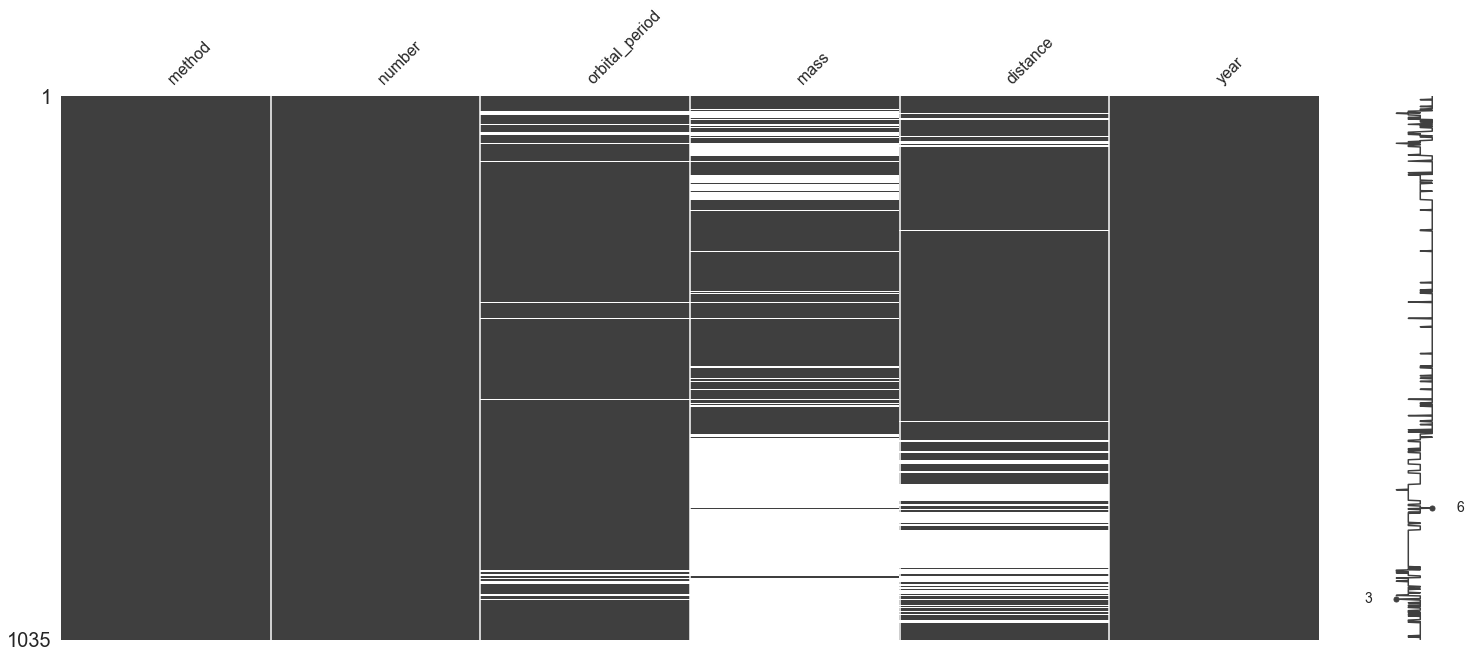

In [357]:
msno.matrix(df);

# Orbital_period eksik olunca mass de eksik oldugu gozlemleniyor .

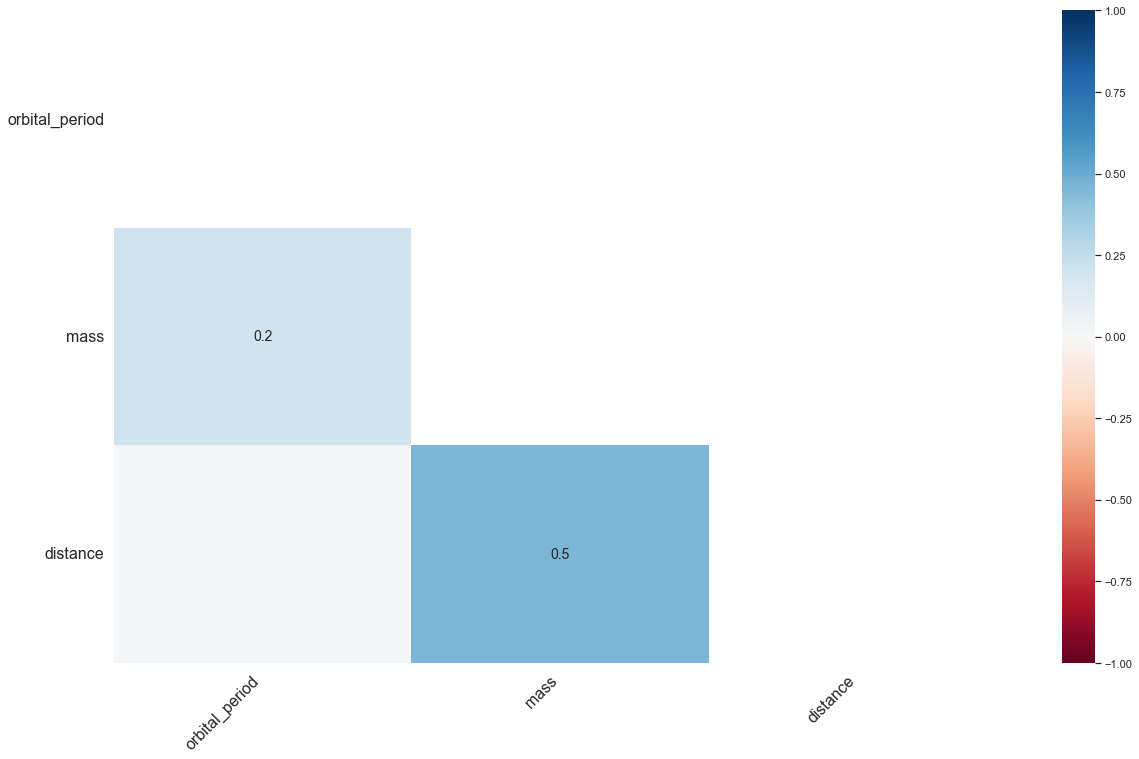

In [360]:
msno.heatmap(df);

# Degerler -1 ile 1 arasinda cikacaktir
# Mass ile distance arasinda 0.5 pozitif orta siddete nulltiy correlation (nulltiy korelasyonu) vardir.
# Mass ile orbital_period arasinda 0.2 poztif dusuk siddet nulltiy corr. vardir.

## Silme Yontemleri

In [372]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### en az bir deger bos ise siler

In [380]:
df.dropna(axis=0, how='any', inplace= False)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Butun degerler bos ise silmek

In [375]:
df.dropna(how= 'all')

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### En az bir bos deger olan kolonlari sil

In [383]:
df.dropna(axis=1)

# Hepsi silinir cunku her kolonda en az bir tane bos deger var

""
0
1
2
3
4
5
6
7
8


#### Kolondaki butun degerler bos ise sil demek

In [384]:
df.dropna(axis= 1 , how= 'all')

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [386]:
df['sil_beni']  = np.NaN
df.head()

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN


In [389]:
df.dropna(axis= 1, how= 'all', inplace= True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Deger Atama Yontemleri

##### Sayisal Degiskenlerde Atma islemleri

In [390]:
df['V1'].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [391]:
df['V1'].fillna(df.V1.mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

### 1. Yontem

In [394]:
df.apply(lambda x : x.fillna(x.mean(), axis = 0))

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### 2. yontem

In [395]:
# df.fillna(df.mean()[:])  ===> Bunu [:] ekledi ???
#df.apply(lambda x : x.fillna(x.mean(), axis = 0)) ile ayni islem

df.fillna(df.mean())

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [399]:
# istenilen  kolonlara ortalama atama

df.fillna(df.mean()['V1':'V2'])    # ==> V2 de dahil

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [402]:
df['V3'].fillna(df['V3'].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

### 3. Yontem

In [407]:
# Bos degerleri bulup yerine kolon ortlamasini atamak

df.where(pd.notna(df), df.mean(), axis= 'columns')

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0
